In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [10]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [11]:
df.shape

(1000, 40)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [13]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [14]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [15]:
df.duplicated().sum()

0

In [16]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [17]:
df.drop(['policy_number','incident_location'],axis=1,inplace=True)

In [18]:
df.police_report_available.unique()

array(['YES', '?', 'NO'], dtype=object)

In [19]:
df.replace('?',np.NaN,inplace=True)
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [20]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                 360
bodily_injuries                   0
witnesses                   

In [21]:
df.drop('_c39',axis=True,inplace=True)

In [22]:
df.collision_type.unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [23]:
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])


In [24]:
df.property_damage.unique()

array(['YES', nan, 'NO'], dtype=object)

In [25]:
df['property_damage']=df['property_damage'].fillna(df['property_damage'].mode()[0])

In [26]:
df.police_report_available.unique()

array(['YES', nan, 'NO'], dtype=object)

In [27]:
df['police_report_available']=df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [28]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [29]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['Month']=pd.DatetimeIndex(df['policy_bind_date']).month
df['year']=pd.DatetimeIndex(df['policy_bind_date']).year
df['day']=df['policy_bind_date'].dt.day


In [30]:
df.drop(['policy_bind_date'],axis=1,inplace=True)
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,year,day
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,6510,13020,52080,Saab,92x,2004,Y,10,2014,17
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,780,780,3510,Mercedes,E400,2007,Y,6,2006,27
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,7700,3850,23100,Dodge,RAM,2007,N,6,2000,9
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,1990,25
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1300,650,4550,Accura,RSX,2009,N,6,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,17440,8720,61040,Honda,Accord,2006,N,7,1991,16
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,18080,18080,72320,Volkswagen,Passat,2015,N,5,2014,1
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,7500,7500,52500,Suburu,Impreza,1996,N,2,2003,17
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,5220,5220,36540,Audi,A5,1998,N,11,2011,18


In [31]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00


<Axes: ylabel='fraud_reported'>

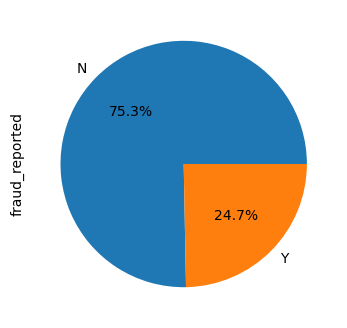

In [32]:
df['fraud_reported'].value_counts().plot.pie(figsize=(5,4),autopct="%.1f%%")

<Axes: ylabel='police_report_available'>

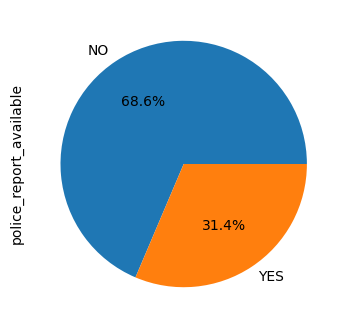

In [33]:
df['police_report_available'].value_counts().plot.pie(figsize=(5,4),autopct="%.1f%%")

<Axes: ylabel='insured_sex'>

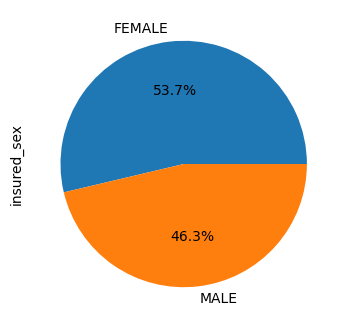

In [34]:
df['insured_sex'].value_counts().plot.pie(figsize=(5,4),autopct="%.1f%%")

<Axes: ylabel='incident_type'>

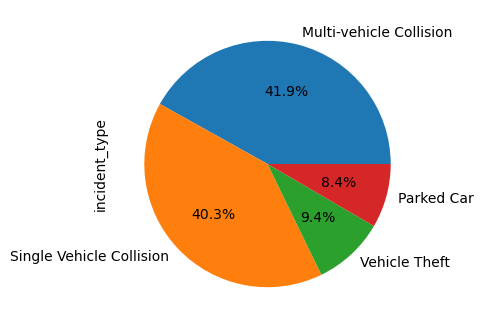

In [35]:
df['incident_type'].value_counts().plot.pie(figsize=(5,4),autopct="%.1f%%")

<Axes: ylabel='authorities_contacted'>

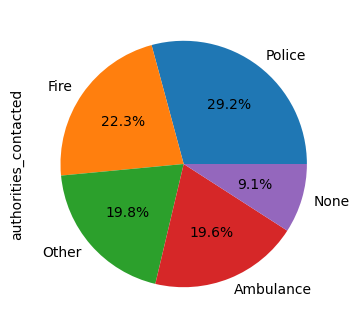

In [36]:
df['authorities_contacted'].value_counts().plot.pie(figsize=(5,4),autopct="%.1f%%")

<Axes: ylabel='witnesses'>

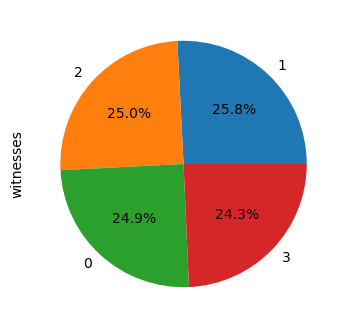

In [37]:
df['witnesses'].value_counts().plot.pie(figsize=(5,4),autopct="%.1f%%")

<Axes: ylabel='incident_state'>

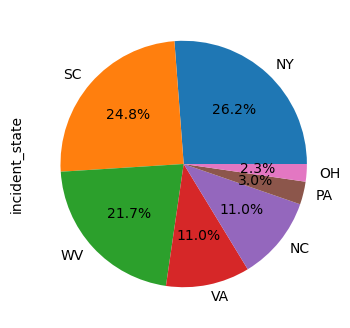

In [38]:
df['incident_state'].value_counts().plot.pie(figsize=(5,4),autopct="%.1f%%")

<Axes: ylabel='incident_city'>

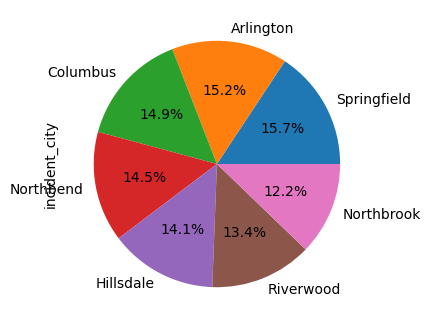

In [39]:
df['incident_city'].value_counts().plot.pie(figsize=(5,4),autopct="%.1f%%")

<Axes: ylabel='Month'>

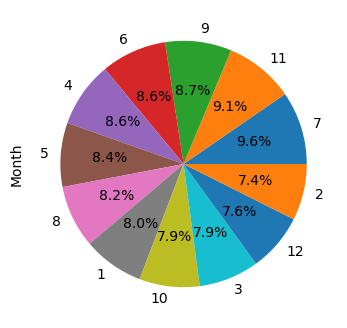

In [40]:
df['Month'].value_counts().plot.pie(figsize=(5,4),autopct="%.1f%%")

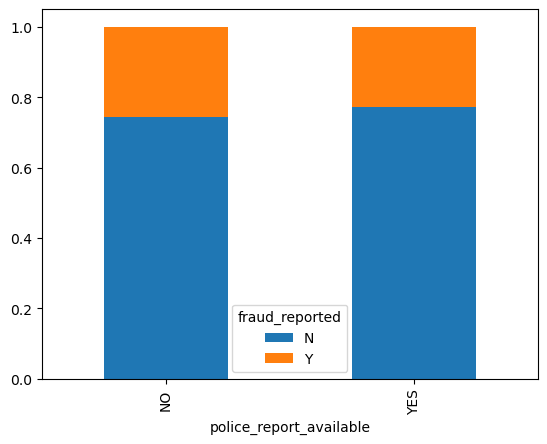

In [41]:
ct=pd.crosstab(df.police_report_available,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.show()

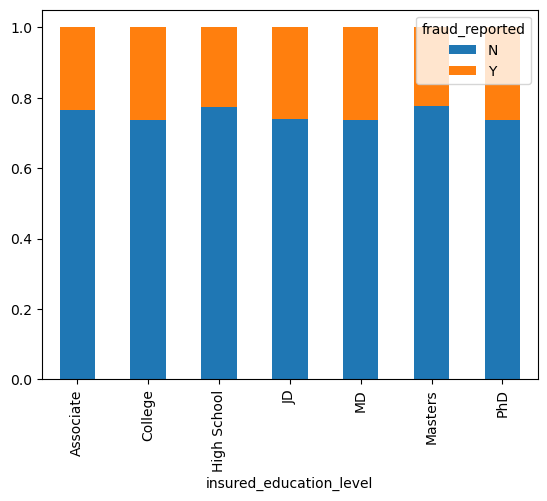

In [42]:
ct=pd.crosstab(df.insured_education_level,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.show()

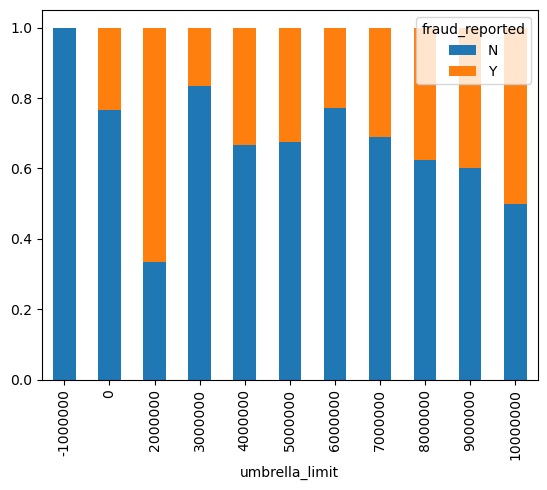

In [43]:
ct=pd.crosstab(df.umbrella_limit,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.show()

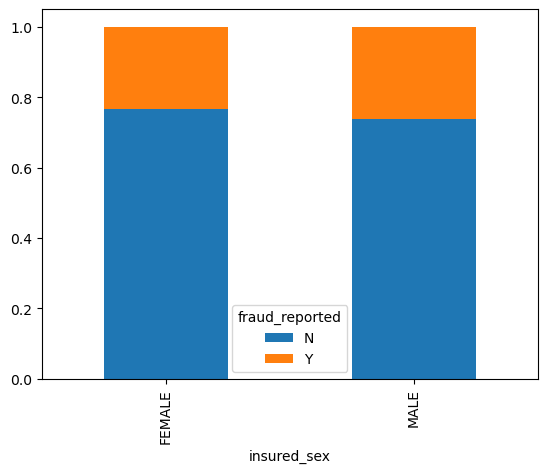

In [44]:
ct=pd.crosstab(df.insured_sex,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.show()

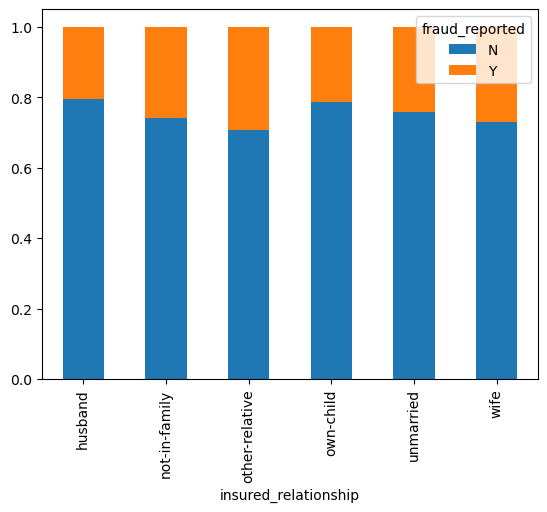

In [45]:
ct=pd.crosstab(df.insured_relationship,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.show()

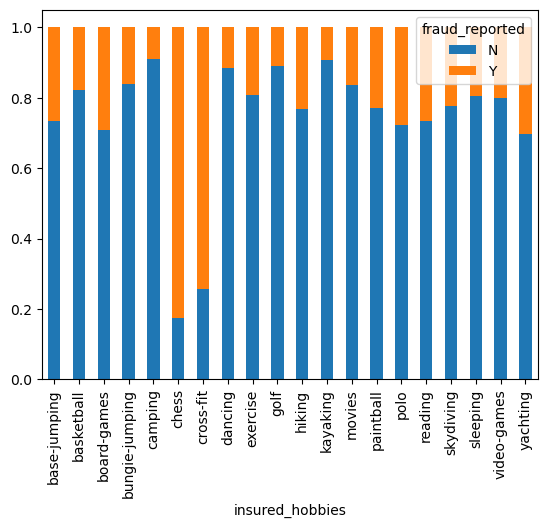

In [46]:
ct=pd.crosstab(df.insured_hobbies,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.show()

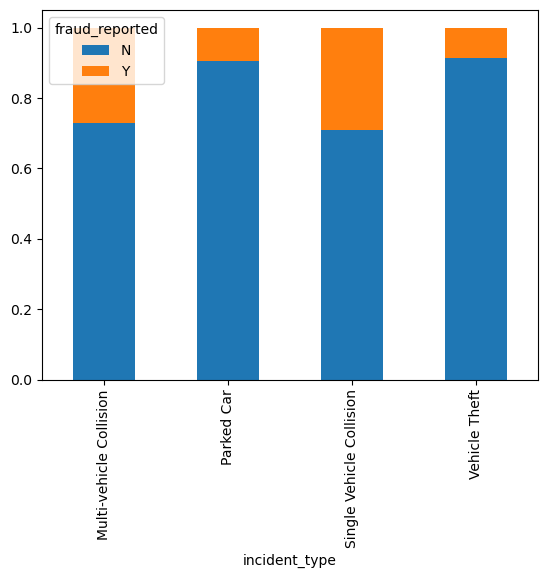

In [47]:
ct=pd.crosstab(df.incident_type,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.show()

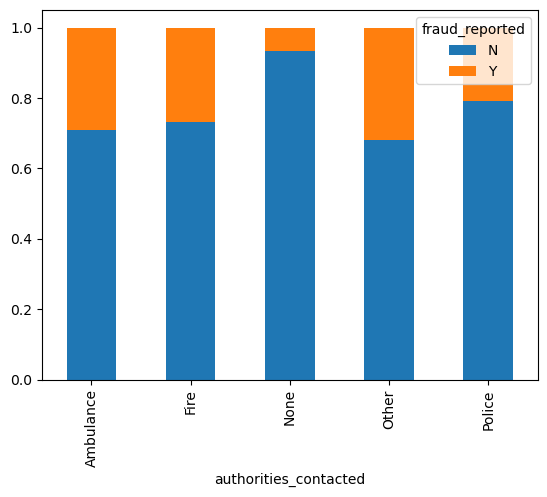

In [48]:
ct=pd.crosstab(df.authorities_contacted,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.show()

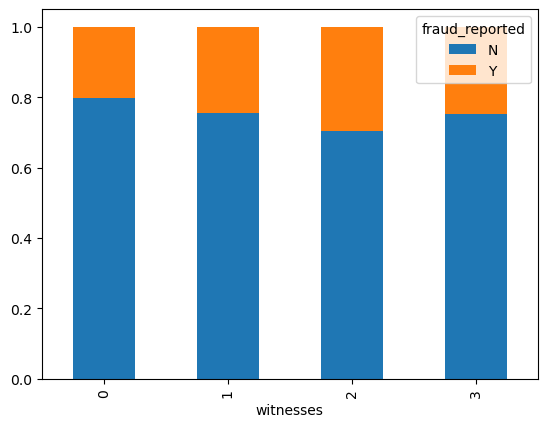

In [49]:
ct=pd.crosstab(df.witnesses,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.show()

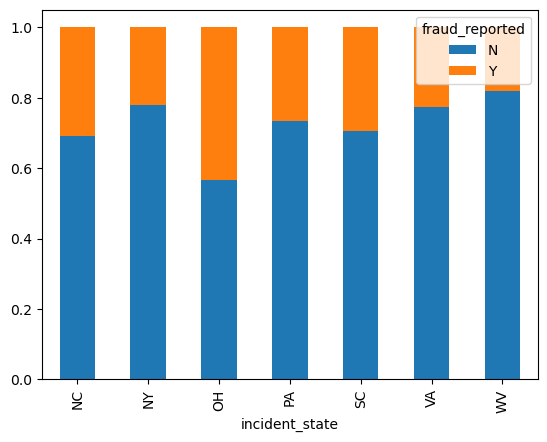

In [50]:
ct=pd.crosstab(df.incident_state,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.show()

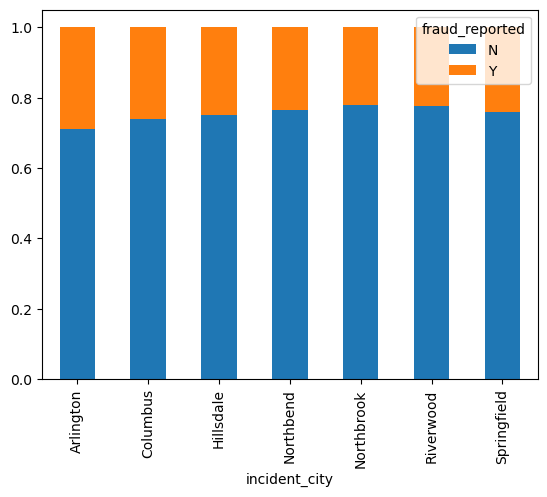

In [51]:
ct=pd.crosstab(df.incident_city,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.show()

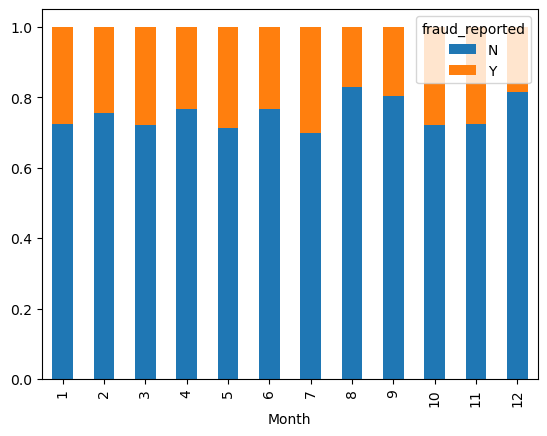

In [52]:
ct=pd.crosstab(df.Month,df.fraud_reported,normalize='index')
ct.plot.bar(stacked=True)
plt.show()

array([[<Axes: title={'center': 'months_as_customer'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'policy_deductable'}>,
        <Axes: title={'center': 'policy_annual_premium'}>],
       [<Axes: title={'center': 'umbrella_limit'}>,
        <Axes: title={'center': 'insured_zip'}>,
        <Axes: title={'center': 'capital-gains'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'incident_hour_of_the_day'}>,
        <Axes: title={'center': 'number_of_vehicles_involved'}>,
        <Axes: title={'center': 'bodily_injuries'}>,
        <Axes: title={'center': 'witnesses'}>],
       [<Axes: title={'center': 'total_claim_amount'}>,
        <Axes: title={'center': 'injury_claim'}>,
        <Axes: title={'center': 'property_claim'}>,
        <Axes: title={'center': 'vehicle_claim'}>],
       [<Axes: title={'center': 'auto_year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: 

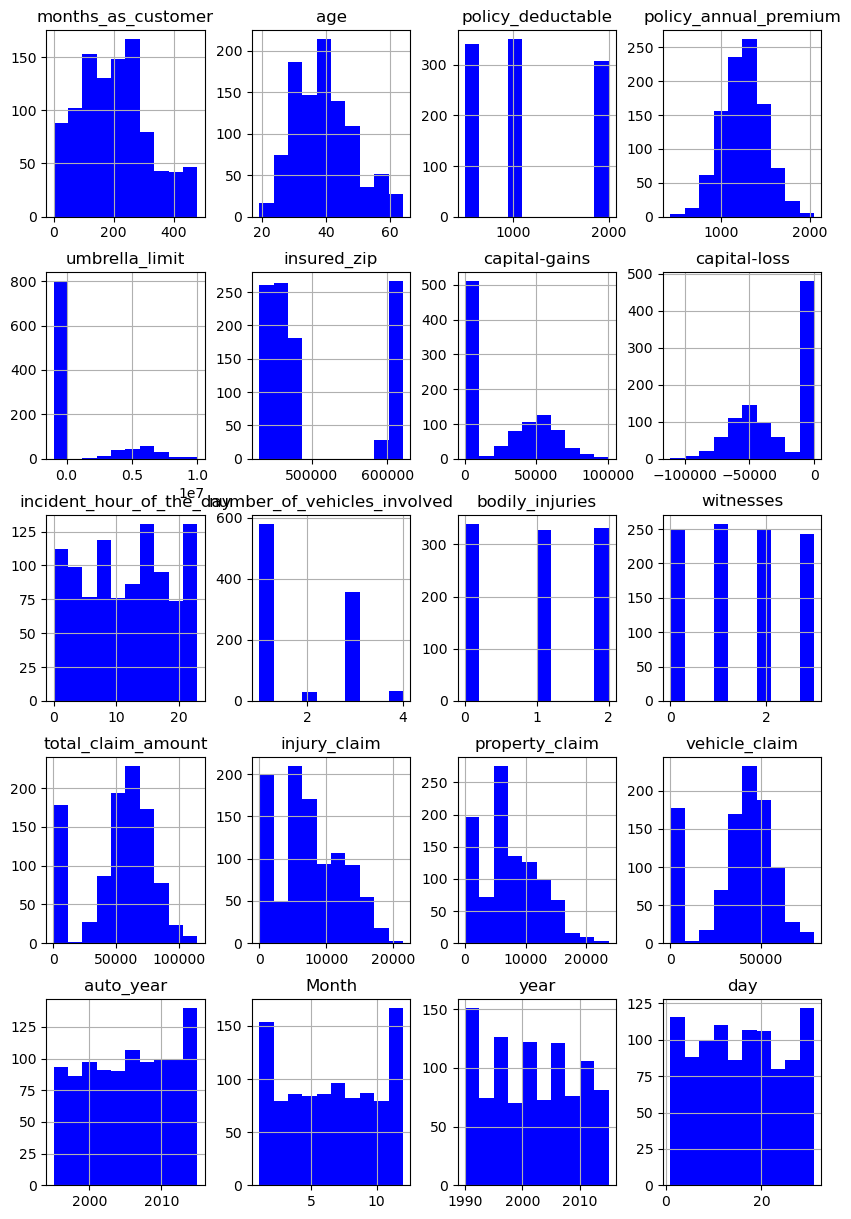

In [53]:
df.hist(figsize=(10,15),color='blue')

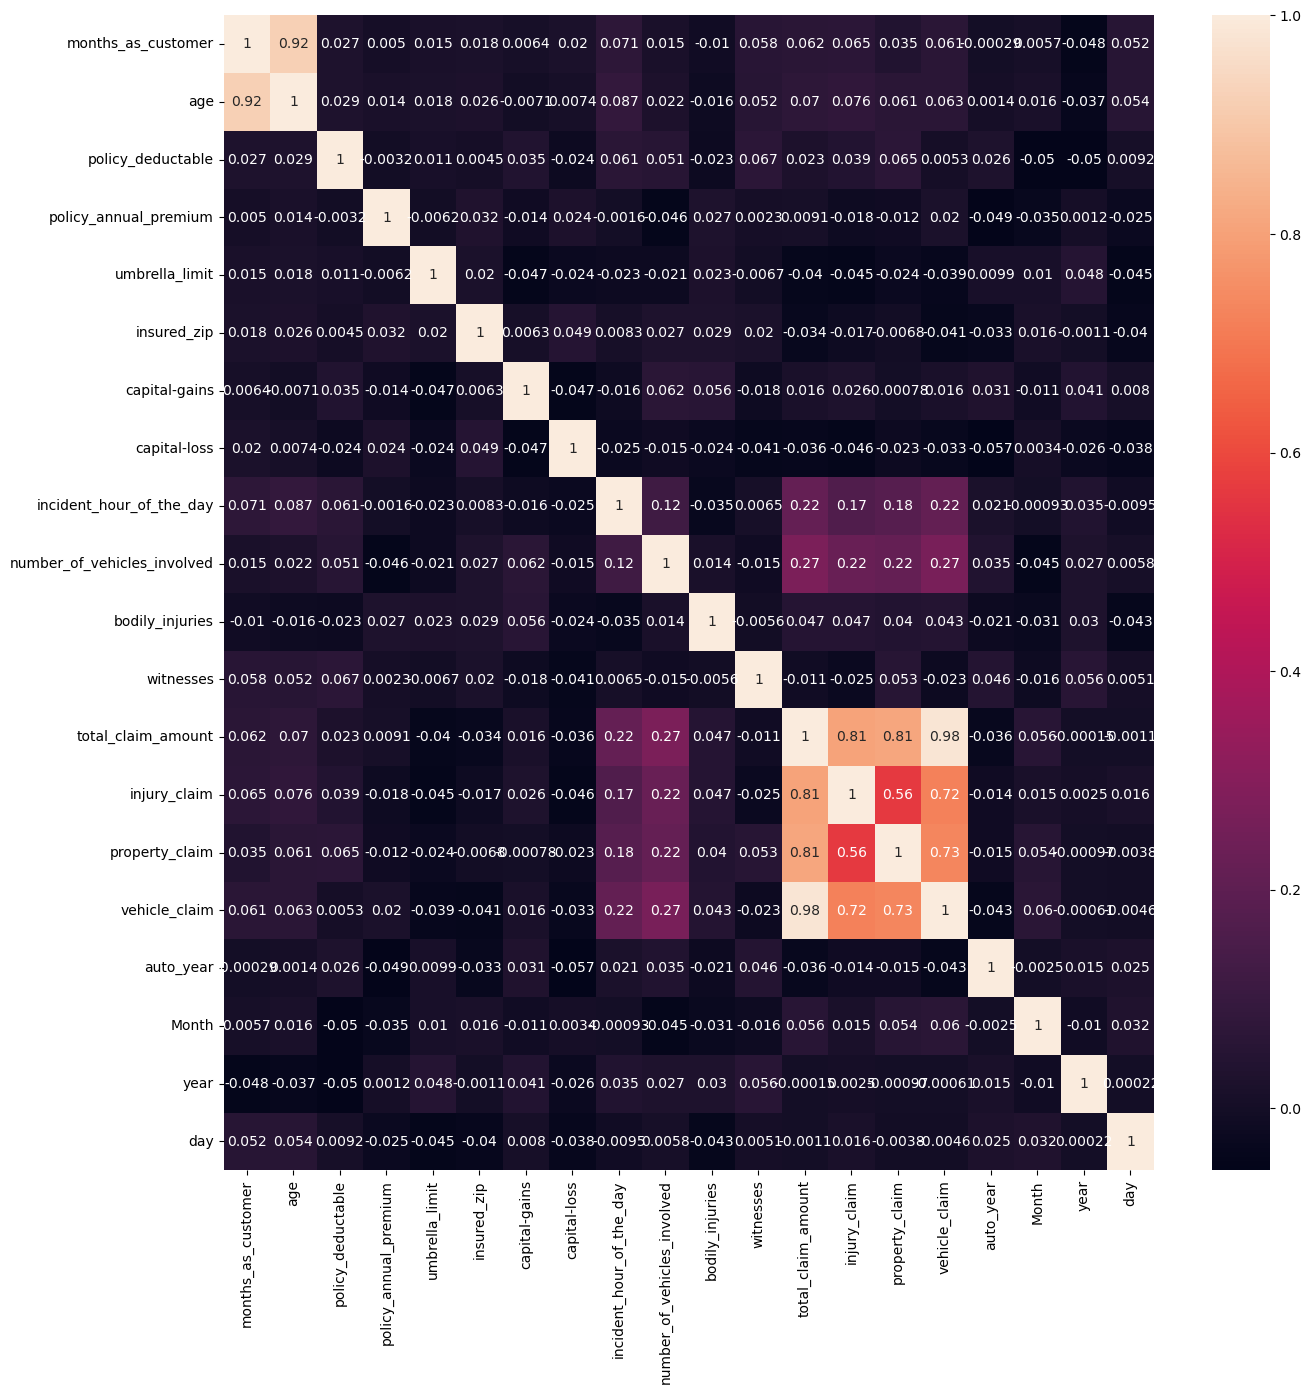

In [54]:
cor=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True)
plt.show()

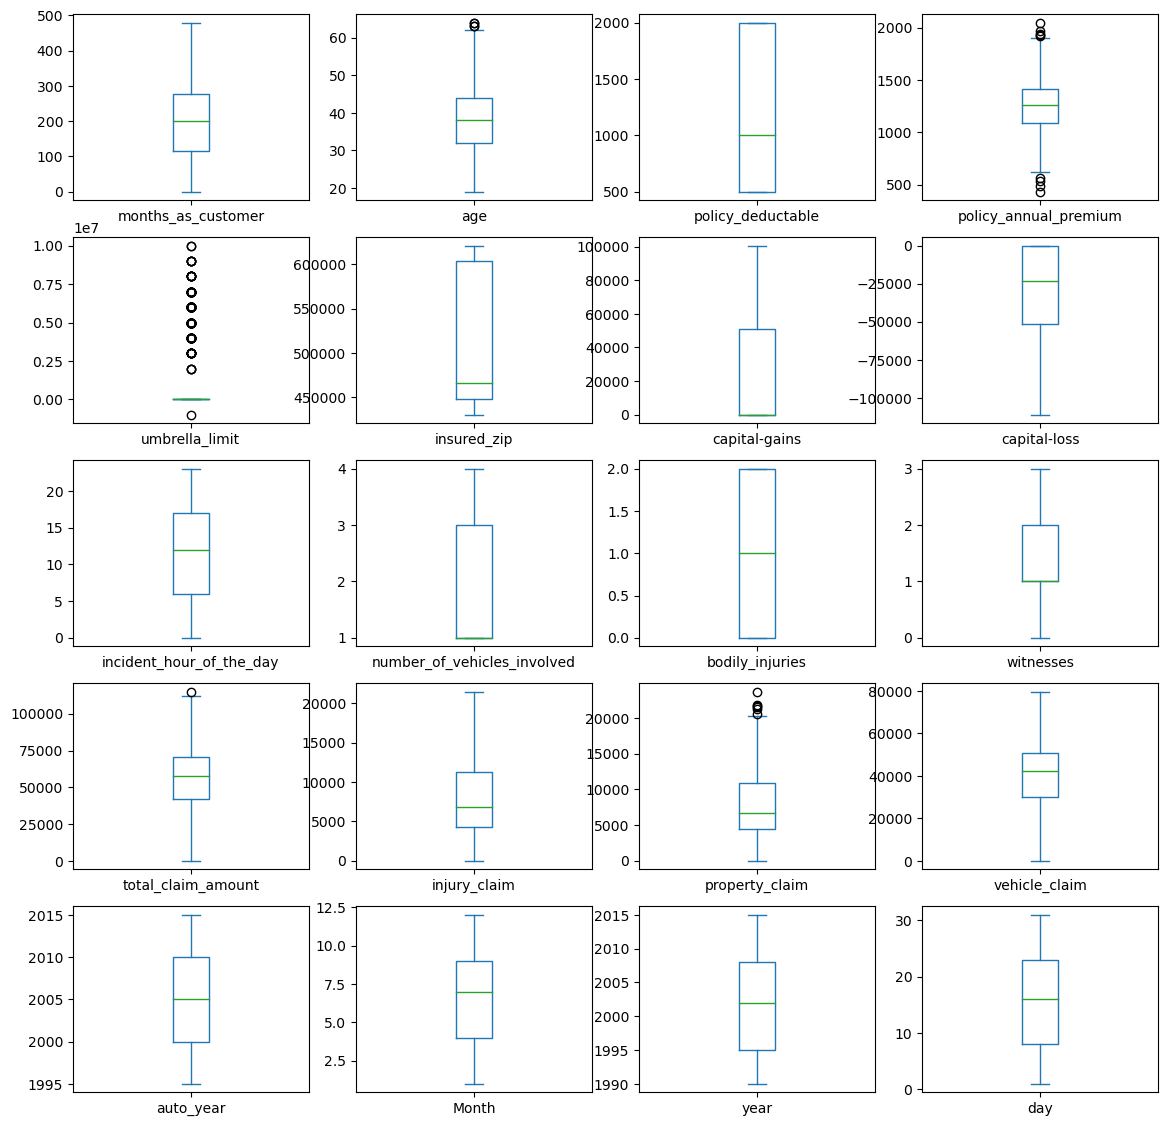

In [55]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(14,14))
plt.show()

In [56]:
df[df["property_claim"]>20000]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,year,day
163,112,30,OH,500/1000,1000,1166.54,0,479852,FEMALE,Masters,...,10790,21580,75530,Dodge,Neon,1997,Y,9,2002,13
299,119,27,IN,250/500,2000,1097.64,0,614812,MALE,High School,...,7080,21240,35400,Accura,TL,2006,N,5,1997,8
301,107,31,IL,100/300,2000,1018.73,5000000,469646,MALE,Associate,...,14420,21630,57680,Honda,CRV,2001,N,11,1994,25
421,147,37,IN,250/500,1000,1306.78,0,466818,MALE,MD,...,13520,20280,47320,Toyota,Camry,1995,N,2,1992,10
500,1,29,OH,500/1000,500,854.58,0,612826,FEMALE,JD,...,7890,23670,55230,Honda,CRV,2003,N,5,2006,24
591,43,43,IL,500/1000,500,1320.39,0,604861,FEMALE,Associate,...,7270,21810,50890,Honda,CRV,1996,Y,7,1997,11
687,194,41,IL,250/500,500,1203.81,0,613119,MALE,JD,...,13700,20550,61650,Saab,95,1999,N,2,1993,15
745,258,41,IL,100/300,500,1042.25,0,601206,MALE,Masters,...,6770,20310,54160,Mercedes,C300,2008,Y,2,2001,15


In [57]:
df.loc[(df["vehicle_claim"]==55230) & (df["property_claim"])==23670,"property_claim"]==21810

Series([], Name: property_claim, dtype: bool)

In [58]:
df[df["umbrella_limit"]>600000]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,year,day
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,780,780,3510,Mercedes,E400,2007,Y,6,2006,27
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,7700,3850,23100,Dodge,RAM,2007,N,6,2000,9
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,5,1990,25
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1300,650,4550,Accura,RSX,2009,N,6,2014,6
10,235,42,OH,100/300,500,1253.12,4000000,462283,FEMALE,Masters,...,7910,15820,63280,Ford,F150,2002,N,5,2002,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,266,42,IN,100/300,500,1093.83,4000000,468454,MALE,Associate,...,4440,8880,39960,Suburu,Impreza,2015,Y,6,2003,3
987,235,39,IL,500/1000,2000,1453.61,4000000,619570,MALE,JD,...,9280,9280,41760,Chevrolet,Tahoe,2012,Y,1,2013,5
990,286,43,IL,100/300,500,1564.43,3000000,477644,FEMALE,MD,...,3810,3810,26670,Jeep,Grand Cherokee,2013,N,5,1994,2
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,7500,7500,52500,Suburu,Impreza,1996,N,2,2003,17


In [59]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
Month                         -0.029321
year                           0.052511
day                            0.024372
dtype: float64

In [60]:
columns=['umbrella_limit','insured_zip']
for i in columns:
    df[i]=np.cbrt(df[i])
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.523380
insured_zip                    0.794586
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
Month                         -0.029321
year                           0.052511
day                            0.024372
dtype: float64

In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=le.fit_transform(df[i])
        

In [62]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Month,year,day
0,328,48,2,1,1000,1406.91,0.000000,77.535925,1,4,...,6510,13020,52080,10,1,2004,1,10,2014,17
1,228,42,1,1,2000,1197.22,170.997595,77.649092,1,4,...,780,780,3510,8,12,2007,1,6,2006,27
2,134,29,2,0,2000,1413.14,170.997595,75.515384,0,6,...,7700,3850,23100,4,30,2007,0,6,2000,9
3,256,41,0,1,2000,1415.74,181.712059,84.721905,0,6,...,6340,6340,50720,3,34,2014,1,5,1990,25
4,228,44,0,2,1000,1583.91,181.712059,84.841967,1,0,...,1300,650,4550,0,31,2009,0,6,2014,6


In [63]:
x=df.drop(["fraud_reported"],axis=1)
y=df['fraud_reported']
y=pd.DataFrame(data=y)
x.shape,y.shape

((1000, 38), (1000, 1))

In [64]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
X,Y=SM.fit_resample(x,y)
y_new=pd.DataFrame(data=Y)
x_new=pd.DataFrame(data=X)
x_new.shape,y_new.shape

((1506, 38), (1506, 1))

<Axes: ylabel='fraud_reported'>

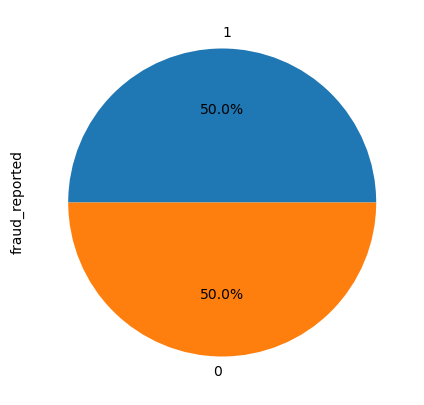

In [65]:
y_new['fraud_reported'].value_counts().plot.pie(figsize=(5,5),autopct='%.1f%%')

In [66]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x_new)
sc_x=pd.DataFrame(sc_x,columns=x_new.columns)
sc_x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Month,year,day
0,1.095145,1.024053,1.389611,0.239013,-0.257876,0.682177,-0.542662,-0.515180,1.233942,0.625004,...,0.683762,-0.252009,1.143386,0.719179,0.983041,-1.742834,-0.179665,1.166486,1.836501,0.171745
1,0.191351,0.343059,0.130433,0.239013,1.468195,-0.226996,2.002236,-0.482543,1.233942,0.625004,...,-2.043948,-1.492525,-1.489670,-2.068795,0.456842,-0.694704,0.350529,-0.090564,0.674412,1.353864
2,-0.658215,-1.132427,1.389611,-1.065169,1.468195,0.709189,2.002236,-1.097910,-0.810411,1.727176,...,-0.831359,0.005620,-0.829254,-0.944306,-0.595555,1.020418,0.350529,-0.090564,-0.197154,-0.773950
3,0.444413,0.229560,-1.128745,0.239013,1.468195,0.720462,2.161695,1.557275,-0.810411,1.727176,...,0.347205,-0.288813,-0.293608,0.641114,-0.858654,1.401556,1.587651,-0.404827,-1.649764,1.117440
4,0.191351,0.570057,-1.128745,1.543196,-0.257876,1.449614,2.161695,1.591901,1.233942,-1.579341,...,-1.985327,-1.379947,-1.517635,-2.009098,-1.647951,1.115702,0.703993,-0.090564,1.836501,-1.128586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,0.869196,0.683556,-1.128745,-1.065169,-0.257876,-0.890372,-0.542662,-0.636627,1.233942,-0.477169,...,0.190528,-0.486906,0.205468,0.341021,0.456842,-0.218281,0.527261,-0.404827,-0.632937,0.171745
1502,0.390186,0.116061,0.130433,-1.065169,-0.929317,-0.644766,1.845282,-0.469298,-0.810411,-1.579341,...,-0.066009,-0.578916,0.206113,0.006027,0.983041,-0.122997,1.764382,-0.090564,0.238629,-1.246798
1503,0.100972,-0.110937,0.130433,0.239013,-0.896522,0.342744,-0.542662,0.916227,1.233942,-0.477169,...,-0.091630,0.625444,-0.392133,-0.189596,-0.858654,-1.552265,-0.002934,-0.090564,0.819674,0.053533
1504,-0.242470,-0.337934,-1.128745,0.239013,-0.257876,0.097480,-0.542662,-0.472004,-0.810411,-0.477169,...,-0.412241,0.012115,-0.687706,-0.396986,-1.384852,1.687410,0.350529,0.537961,-1.213981,0.999228


In [67]:
from sklearn.decomposition import PCA
testPCA=PCA()
Y=testPCA.fit(sc_x)
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 10.29556364,  15.63819724,  20.08684228,  24.42490853,
        28.0022263 ,  31.32981531,  34.61032784,  37.78207748,
        40.85636132,  43.87379409,  46.88372555,  49.80617041,
        52.61686326,  55.39458305,  58.10445378,  60.79125483,
        63.36452982,  65.84356981,  68.30515377,  70.71414926,
        73.09328896,  75.45248116,  77.76163656,  79.99000308,
        82.16341538,  84.27431029,  86.33543472,  88.37985482,
        90.35770204,  92.28946461,  94.18708294,  95.95838051,
        97.63480863,  98.80342269,  99.42297497,  99.81837128,
       100.        , 100.        ])

In [68]:
FinalPCA=PCA(n_components=32)
final_x=FinalPCA.fit_transform(sc_x)
finalx=pd.DataFrame(final_x)
finalx
x=finalx

In [69]:
y=y_new
x.shape,y.shape

((1506, 32), (1506, 1))

In [70]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score

In [71]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.30, random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu=acc
        maxRS=i
print('Maximum r2 score is ',maxAccu ,'on Random_state ',maxRS)


Maximum r2 score is  0.7964601769911505 on Random_state  45


In [72]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30, random_state=130)


In [73]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
adc=AdaBoostClassifier(n_estimators=100)
model=[lg,sv,knn,rfc,dtc,gnb,adc]
Test=[]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print("Accuracy score of",m)
    print(accuracy_score(y_test,pred))
    Test.append(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

Accuracy score of LogisticRegression()
0.7654867256637168
[[177  61]
 [ 45 169]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       238
           1       0.73      0.79      0.76       214

    accuracy                           0.77       452
   macro avg       0.77      0.77      0.77       452
weighted avg       0.77      0.77      0.77       452

Accuracy score of SVC(probability=True)
0.8495575221238938
[[208  30]
 [ 38 176]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       238
           1       0.85      0.82      0.84       214

    accuracy                           0.85       452
   macro avg       0.85      0.85      0.85       452
weighted avg       0.85      0.85      0.85       452

Accuracy score of KNeighborsClassifier()
0.6747787610619469
[[ 94 144]
 [  3 211]]
              precision    recall  f1-score   support

           0       0.97      0.39      0.56  

In [74]:
cv=[]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    cv.append(score.mean())
    print("Mean accuracy of",m)
    print(score.mean())
    

Mean accuracy of LogisticRegression()
0.7331763877582451
Mean accuracy of SVC(probability=True)
0.8089084948625993
Mean accuracy of KNeighborsClassifier()
0.674002772216233
Mean accuracy of RandomForestClassifier()
0.8069151393808717
Mean accuracy of DecisionTreeClassifier()
0.701927350333326
Mean accuracy of GaussianNB()
0.7809927174319597
Mean accuracy of AdaBoostClassifier(n_estimators=100)
0.7544256452003257


In [75]:
def Plot_roc_cur(fper,tper):
    plt.plot(fper,tper,color='Orange',label='ROC')
    plt.plot([0,1],[0,1],color='blue',linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")
    
    plt.title("ROC Curve")
    plt.show()

Roc_Auc score of  LogisticRegression()
0.7667085525799104


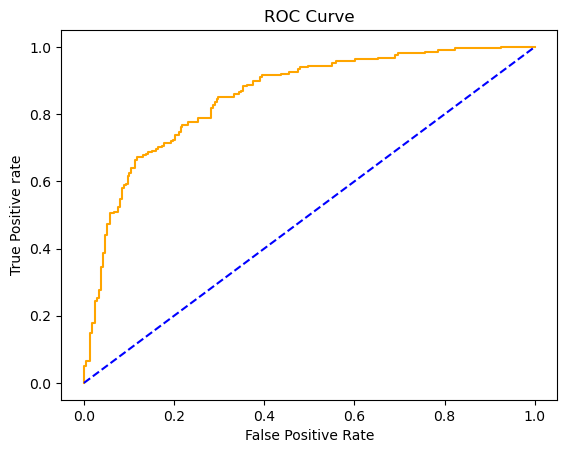

Roc_Auc score of  SVC(probability=True)
0.8481897431869945


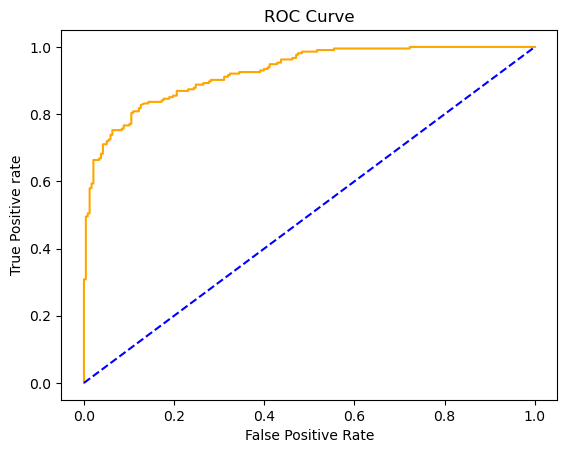

Roc_Auc score of  KNeighborsClassifier()
0.6904696458022461


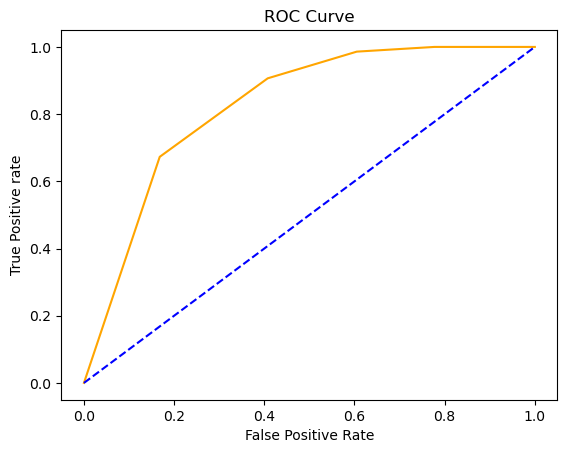

Roc_Auc score of  RandomForestClassifier()
0.8287913296159585


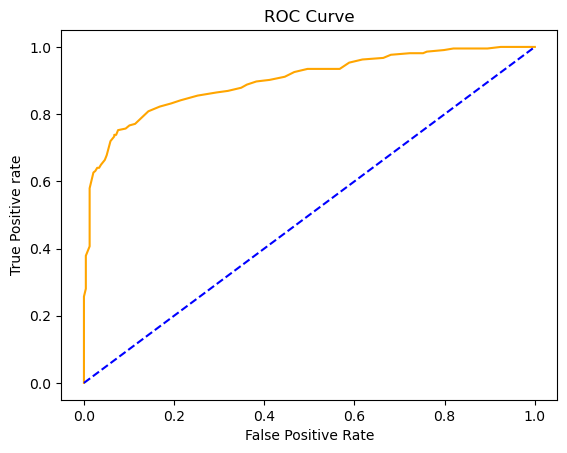

Roc_Auc score of  DecisionTreeClassifier()
0.703172857928218


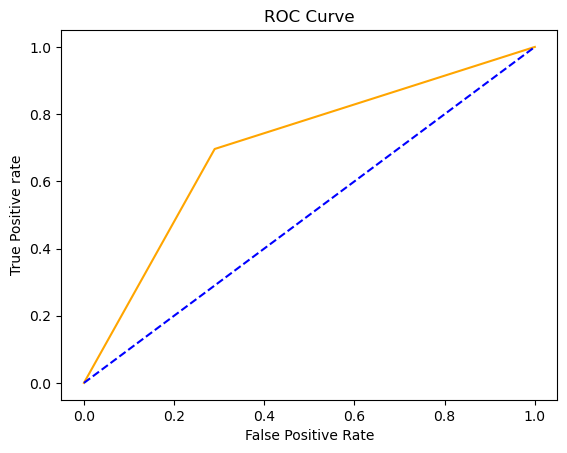

Roc_Auc score of  GaussianNB()
0.7898177962773895


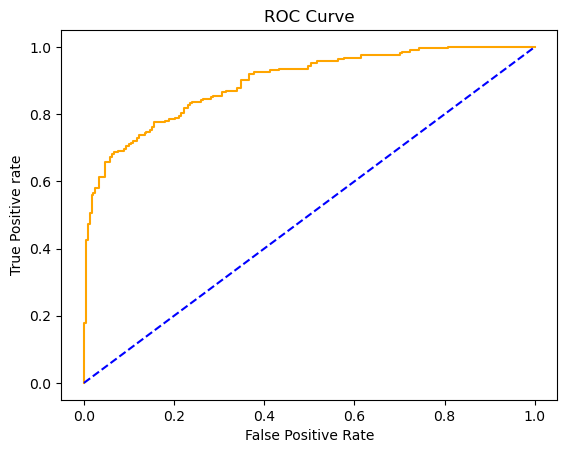

Roc_Auc score of  AdaBoostClassifier(n_estimators=100)
0.7844577083169717


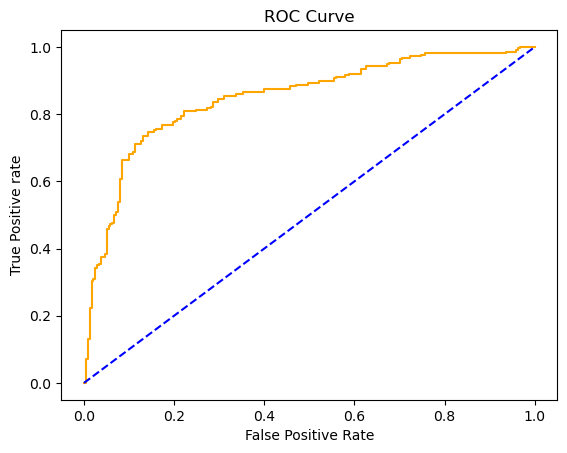

In [76]:
auc=[]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    score=roc_auc_score(y_test,pred)
    auc.append(score)
    print("Roc_Auc score of ",m)
    print(score)
    probs=m.predict_proba(x_test)
    probs=probs[:,1]
    fper,tper,thresholds=roc_curve(y_test,probs)
    Plot_roc_cur(fper,tper)
    

In [77]:
Performance={'Model':["LogisticRegression","SVC","KNeighborsClassifier","RandomForestClassifier","DecisionTreeClassifier","GaussianNB","AdaBoostclassifier"],
                     "Test_Score":Test,"Cross_Validation_Score":cv,'Roc_Auc_score':auc}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test_Score,Cross_Validation_Score,Roc_Auc_score
0,LogisticRegression,0.765487,0.733176,0.766709
1,SVC,0.849558,0.808908,0.848190
2,KNeighborsClassifier,0.674779,0.674003,0.690470
3,RandomForestClassifier,0.831858,0.806915,0.828791
4,DecisionTreeClassifier,0.679204,0.701927,0.703173
5,GaussianNB,0.789823,0.780993,0.789818
6,AdaBoostclassifier,0.783186,0.754426,0.784458


In [78]:
from sklearn.model_selection import GridSearchCV
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [79]:
parameters={'max_depth':[10,20,30,40,None],
           'max_features':['auto','sqrt'],
           'min_samples_leaf':[1,2,4],
           'min_samples_split':[2,5,10],
           'n_estimators':[5,10,20,30,50,100],
           'criterion':['gini','entropy']
           }

In [80]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

RandomForestClassifier after HyperTuning
Accuracy Score: 82.52212389380531
Cross Validation Score: 79.96083694528173
AUC ROC Score 82.36668499175371
AUC ROC Score with final mod


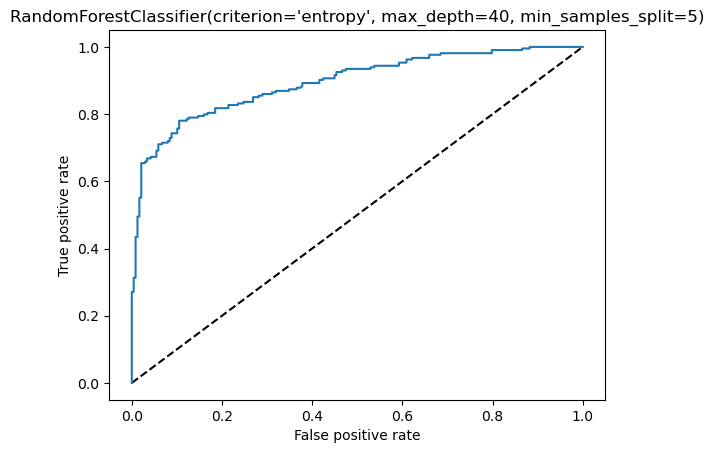

In [81]:
Finalmod=RandomForestClassifier(max_features='sqrt',min_samples_leaf=1,min_samples_split=5,n_estimators=100,max_depth=40,criterion='entropy')
Finalmod.fit(x_train,y_train)
pred1=Finalmod.predict(x_test)
acc1=accuracy_score(y_test,pred1)
cvs1=cross_val_score(Finalmod,x,y,cv=5)
y_pred_prob=Finalmod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score1=roc_auc_score(y_test,Finalmod.predict(x_test))
print("RandomForestClassifier after HyperTuning")
print("Accuracy Score:",acc1*100)
print("Cross Validation Score:",cvs1.mean()*100)
print("AUC ROC Score",auc_score1*100)
print("AUC ROC Score with final mod")
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=RandomForestClassifier)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title(Finalmod)
plt.show()

In [82]:
import joblib
joblib.dump(Finalmod,'fraud detection.obj')

['fraud detection.obj']